In [2]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np 
from scipy import stats
from galpy.util import bovy_coords
import astropy.units as u



%matplotlib inline
%config InlineBackend.figure_format = 'png'

## Problem 2

In order to examine the shape of the bar, we project our coordinates to a 2D cartesian plane in the <X,Z> plane. Seen from fig.1, using a 2D density kernel, for each bin we take the log value of the number sensity at each grid. The distrinct shape 'X' shape of the bar does not seem to require any further maniplulatio in order to reveal its shape. We found during our analysis, that the smaller the bin size of the 2D histogram decreases, the easier it becomes to reveal the shape.



i) By closer inspection, it is evident that the X shape bar, is not perfectly aligned with the galactic center ~(0,0), but seems to be slighly skewed $\Delta(x)$~0.1kpc & $\Delta(z)$~-0.1kpc.

In order to __roughly__ estimate the strength of the bar, we can approximate by measuring the velocity in the X plane, thus the median $V_x$ for each spatial bin. 


Seen in figure 3, above Z>0, we note an "blob" like feature colorcoded the $V_x$ at roughly $Z \approx +1.4$ kpc. Such feature might indicate that perhaps the north and sourth parts of the X-shape bar, might have instabilities. It is important to notice however, that the evolution of bars is not constant, but during the evolution of the Galaxy they can grow in strength and shape ([Abbott et al. 2016](https://arxiv.org/pdf/1703.07366.pdf))



ii) Given the (X,Y,Z) positions of each particle in the N-body simulation, we can convert them to cylindrical coordinates (r, $\theta$, z) and vary $\theta$ such that $\theta$$\epsilon [0,2 \pi]$. [Seen in this animation](https://github.com/AndyTza/modern_astro/blob/master/output_1U7ywA.gif), we find that as we rotate with r=8 kpc from the Galactic center, that the 'X' shape smears as a function of $\theta$. One reason why such smearing effect might be taking place is due to the number density at each line of sight. Assuming that there are spiral arm densities, we expect that going around the Galactic center that certain features may be smeared out in density due to the high number of stars/particles found at that line of sight. Similarly, the vertical position of the observer or instead the normal angle $i$ at the center of each galaxy may also strongly affect how the bar is viewed. 




In [3]:
# load data 
dt = [('x','f8'),('y','f8'),('z','f8'),('vx','f8'),('vy','f8'),('vz','f8')]
data = np.genfromtxt('/Users/iraf1/Downloads/modelR1GaiaChallenge',dtype=dt)

In [4]:
# Append physical coodinates and velocities 
x,y,z = [], [], []
vx, vy, vz = [], [], []
for i in range (0,7489269):
    # Append data 
    x.append(data[i][0])
    y.append(data[i][1])
    z.append(data[i][2])
    vx.append(data[i][3])
    vy.append(data[i][4])
    vz.append(data[i][5])
    
x,y,z = np.array(x), np.array(y), np.array(z) 
vx,vy,vz = np.array(vx), np.array(vy), np.array(vz) 

step:0
/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]



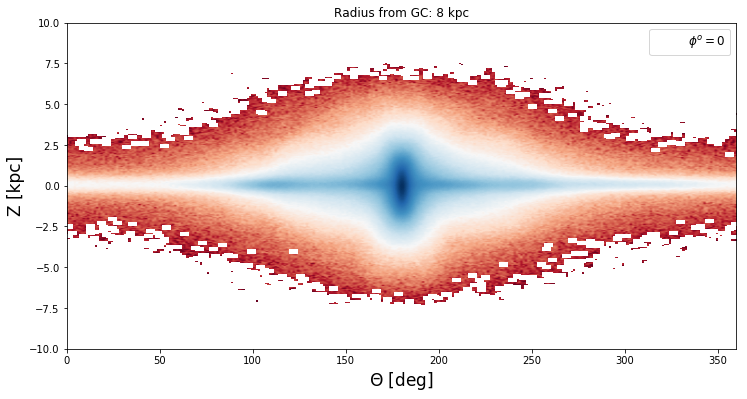

In [42]:
# Orbit the GC with radius 8kpc
thet = np.arange(0,2*np.pi, step=0.01)
x_pr = 8.*np.cos(thet)
y_pr = 8.*np.sin(thet)

for i in range (0, 1):
    cyl = bovy_coords.XYZ_to_galcencyl(x+x_pr[i], y+y_pr[i], z)
    print ("step:%d"%i)

    Hg = np.histogram2d(cyl[:,2], cyl[:,1], bins=300)

    plt.figure(figsize=(12,6))
    plt.imshow(np.log(Hg[0]), aspect='auto', cmap='RdBu', interpolation='gaussian', extent=[0,360,-10,10])
    plt.scatter(3,0, s=0.001, color='white', label='$ \phi^{o} = %d $'%i)
    plt.xlabel('$\Theta$ [deg]', size=17)
    plt.ylabel('Z [kpc]', size=17)
    plt.legend(fontsize=12)
    plt.title('Radius from GC: 8 kpc')

## Example of whole disk <X,Z>

/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.



Text(0,0.5,'Log($\\Sigma(x,y)$)')

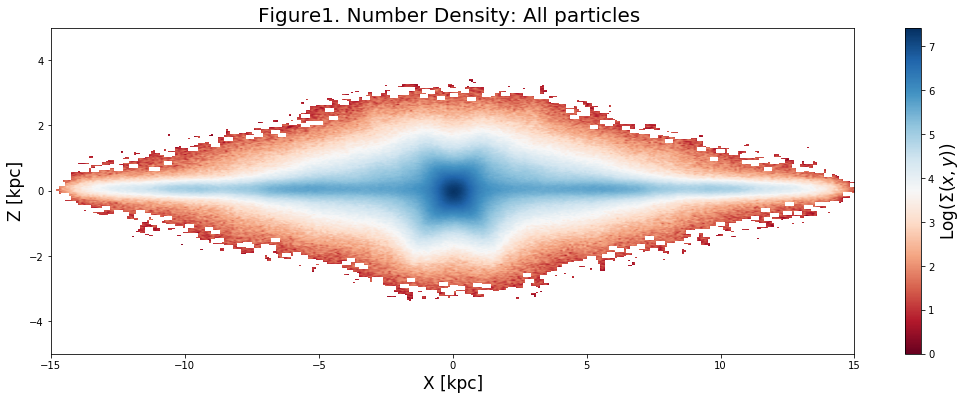

In [5]:
H = np.histogram2d(z, x, bins=(np.arange(-3,3,step=0.008), np.arange(-15,15,step=0.08)))

fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))
Z = plt.imshow(np.log(H[0]), aspect='auto', extent=[-15, 15, -5,5], cmap='RdBu', interpolation='gaussian')
ax.set_xlabel('X [kpc]', size=17)
ax.set_ylabel('Z [kpc]', size=17)
cbar = fig.colorbar(Z)
ax.set_title('Figure1. Number Density: All particles ', size=20)

cbar.ax.set_ylabel('Log($\Sigma(x,y)$)', fontsize=17)


/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.



Text(0.5,1,'Figure 2. Number Density: Zoomed on the X-shape Bar')

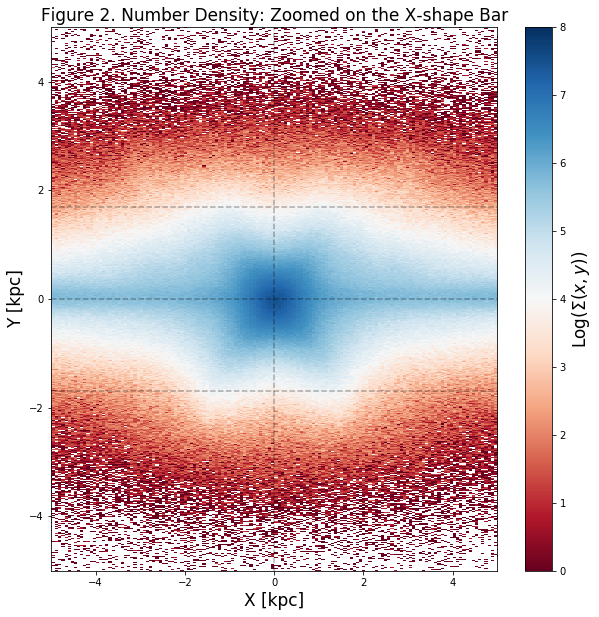

In [40]:
H = np.histogram2d(z, x, bins=(np.arange(-3,3,step=0.01), np.arange(-15,15,step=0.07)))

fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
Z = plt.imshow(np.log(H[0]), aspect='auto', extent=[-15, 15, -5,5], cmap='RdBu',
               interpolation='nearest', vmin=0, vmax=8)
ax.set_xlabel('X [kpc]', size=17)
ax.set_ylabel('Y [kpc]', size=17)
cbar = fig.colorbar(Z)
cbar.ax.set_ylabel('Log($\Sigma(x,y)$)', fontsize=17)
ax.set_xlim(-5,5)
ax.axhline(0, color='k', ls='--', alpha=0.3)
ax.axhline(1.7, color='k', ls='--', alpha=0.3)
ax.axhline(-1.7, color='k', ls='--', alpha=0.3)
ax.axvline(0, color='k', ls='--', alpha=0.3)
ax.set_title('Figure 2. Number Density: Zoomed on the X-shape Bar', size=17)



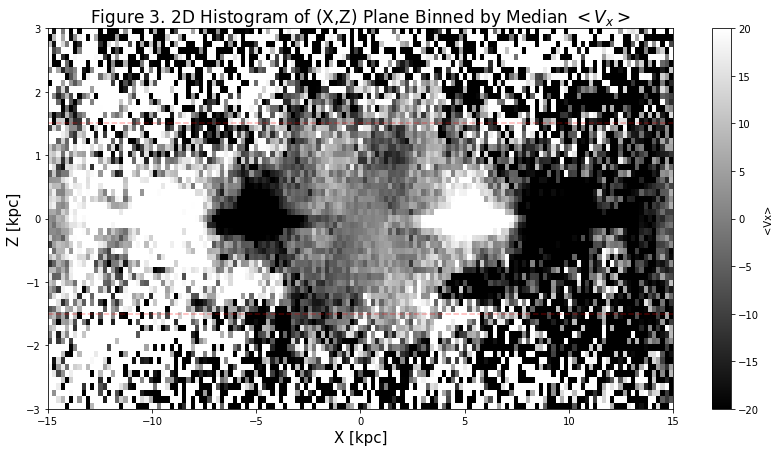

In [41]:
Hv = stats.binned_statistic_2d(z, x, vx, statistic='median',
                              bins=(np.arange(-3,3,step=0.1), np.arange(-15,15,step=0.2)))

fig = plt.figure(figsize=(14,7))
Z =plt.imshow((Hv[0]), aspect='auto', cmap='gray', vmin=-20, vmax=20, interpolation='nearest',
            extent=[-15,15, -3,3])
plt.axhline(1.5, color='red', ls='--', alpha=0.3)
plt.axhline(-1.5, color='red', ls='--', alpha=0.3)
plt.xlabel('X [kpc]', size=15)
plt.ylabel('Z [kpc]', size=15)
plt.title('Figure 3. 2D Histogram of (X,Z) Plane Binned by Median $<V_x>$', size=17)
cbar = fig.colorbar(Z, label='<Vx>')


### Problem 3

__a)__ We can approximately estimate the thermal timescale of Jupiter with a given mass ($M_J$), radius ($R_J$) and luminosity ($L_J$)

$$\begin{equation*} \tau_{thermal} \approx  \frac{GM^2}{RL} \end{equation*}$$


By pluging in the known values, we estimate that the thermal timescale of Jupiter:

$$\begin{equation*} \tau_{thermal} \approx  1.01*10^{19} seconds \approx 14 \space{} Gyr\end{equation*}$$

Converstly, we estimate the dynamic timescale of Jupiter and estimate : 

$$\begin{equation*} \tau_{dynamic} \approx \sqrt{\frac{R_J^3}{2GM_J}}
\end{equation*}$$

$$\begin{equation*} \tau_{dynamic} \approx 1188 \space{} seconds \end{equation*}$$


Since $\tau_{dynamic}$ $<$ $\tau_{thermal}$ we can conclude that Jupiter is most likely driven by its gravitational collapse. Thus we conclude that Jupiter is in hydrostatic eqillibrium. 


__b)__ We define approximately the total energy of the Jupiter system ($E$):

$$\begin{equation*} E = \Omega + U\end{equation*}$$

We also know from the Vririal Theorem that

$$\begin{equation*} U = -\frac{\Omega}{2} \end{equation*}$$

Using the last two relationshis, we can now solve for the E in terms of $\Omega$

$$\begin{equation*} E = \Omega - \frac{\Omega}{2} \end{equation*}$$


$$\begin{equation*} E = \frac{\Omega}{2} \end{equation*}$$

Finally we know that the potential of the system: 

$$\begin{equation*} \Omega = -\frac{GM_J^2}{R_J} \end{equation*}$$


Since E is related to the Luminosity ($L*t$), we can rewrite our energy equation

$$\begin{equation*} L_{J} * t = \space{} -\frac{GM_J^2}{2R_J}\end{equation*}$$


Since we're looking for the rate of change of the radius ($\dot{R}$), we can take the time derivative on both sides

$$\begin{equation*} \frac{d}{dt} L_{J} * t = \space{} -\frac{d}{dt}\frac{GM_J^2}{2R_J}\end{equation*}$$

Note that we can use the reciprical derivative rule : $d/dt$ ($1$/$R$) = -$R'$/$R^2$


Finally, we solve for $\dot{R}$:

$$\begin{equation*} \dot{R} = \frac{2 R_J^2 L_J}{GM_J^2}\end{equation*}$$

Using the known values, we estimate that the rate of which Jupiters radius is changing is approximately 

$$\begin{equation*} \dot{R} \approx -1.4*10^{-11} \space{} ms^{-1}\end{equation*}$$

Note that since the radius is contracting, the rate of which the radius is changing ($\dot{R}$) must be negative.

In [54]:
# Calculations for problem 3
# Units
G_const = 6.674e-11 * u.newton*(u.meter)**2/u.kg**2
Mj = 1.9e27 * u.kg
Rj = 7.1e7 * u.meter
Lj = 8.7e-10*(3.848e26 * u.Watt)

#Equations 
t_thermal = (G_const*(Mj)**2)/(Rj*Lj) # seconds
t_dyn = np.sqrt(Rj**3/(2*G_const*Mj)) # seconds
r_dot = ( 2*Rj**2 * Lj)/(G_const*Mj**2) # meters/seconds

## Problem 4 

Full [solutions](https://github.com/AndyTza/modern_astro/blob/master/ModernAstroHW4.jpg) can be found here.  

## Problem 5

__a)__ 

Apply the mean free path equation: 


$$\begin{equation*} \ell = \frac{1}{\kappa \rho}\end{equation*}$$

For the given $\rho$ and $\kappa$, we estimate the length which we could see through the Earths atmosphere with the opacity of the photosphere : 

$$\begin{equation*} \ell \approx 32 m\end{equation*}$$

For comparison we can approximate $\ell_{E}$ for the Earth with opacity $\kappa$ $=10^{-5}$ $cm^2$/g and average density $\rho = 5.51 g/cm^3$

$$\begin{equation*} \ell_{E} \approx 833.3 km\end{equation*}$$

However we note that this is dependent on the opacity factor and density of the atmosphere which we know do not remain constant for different parts of the atmosphere. Different parts of the atmosphere in fact have different densities and thus opacity factors.


__b)__ We can similarly now find this for the center of the sun 
 $\kappa$ $=1.16$ $cm^2$/g and average density $\rho_{sol} =162 g/cm^3$
 
 $$\begin{equation*} \ell_{sol} \space{}\approx 5.3*10^{-5} m\end{equation*}$$
 
 
 
 
__c)__

By definition, a photon with mean free path ($\ell$) will travel distance 
 
 $$\begin{equation*} 
 d = \ell \sqrt{N}
 \end{equation*}$$
 
 Since we can assume that $\ell$=$\ell_{sol}\space{}$ and the total distance traversed for the photon is roughly the solar radius, $d$=$R_{\odot}$, we can find the number of random walks N: 
 
 $$\begin{equation*} 
N = \frac{R^2_{\odot}}{\ell_{sol}^2}
 \end{equation*}$$
 
Then the total distance travelled by the electron can be 

 $$\begin{equation*} 
 d_{total} = N \ell
 \end{equation*}$$
 
And equating with the Number of random walks estimate above: 
 
 $$\begin{equation*} 
 d_{total} = N \ell
 \end{equation*}$$
 
 
  
 $$\begin{equation*} 
 d_{total} = \ell_{sol} \frac{R^2_{\odot}}{\ell^2_{sol}} = \frac{R^2_{\odot}}{\ell_{sol}}
 \end{equation*}$$
 
 
Finally to compute the time the photon will take to reach the surface, given the information above, we can suggest that the time is equal to



  $$\begin{equation*} 
  \tau = \frac{d_{total}}{c} = \frac{R^2_{\odot}}{\ell_{sol}*c}
 \end{equation*}$$
 
 
 We estimate that that the average time for a photon to reach the surface of the sun is 
 
 
   $$\begin{equation*} 
  \tau \approx 3.03*10^{13} sec
 \end{equation*}$$
 






In [5]:
# Calculations for problem 5

# Units for calculations
from astropy.constants import c # speed of light 
kapa = 0.264 * (u.cm**2/u.gram) 
rho = 1.2e-3 * (u.gram/u.cm**3)
rho_earth = 5.51 * (u.gram/u.cm**3)
kapa_earth = 1e-5 * (u.cm**2/u.gram) # thin optically 
kapa_sun = 1.16 * (u.cm**2/u.gram) 
rho_sun = 162 * (u.gram/u.cm**3)
r_solar = 6.957e8 * (u.meter)

lam = 1/(kapa*rho*1e2) # meters
lam_earth = 1/(kapa_earth*rho_earth*1e2) # meters
lam_sun = 1/(kapa_sun*rho_sun*1e2) # meters
time = (r_solar**2)/(lam_sun*c)